In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [ ]:
df=df[["Survived","Pclass","Sex","Age","SibSp","Embarked","Child"]]

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,female,38.0,1,C,0
1,1,1,female,35.0,1,S,0
2,0,1,male,54.0,0,S,0
3,1,3,female,4.0,1,S,1
4,1,1,female,58.0,0,S,0


In [ ]:
import sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
le=preprocessing.LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,0,38.0,1,C,0
1,1,1,0,35.0,1,S,0
2,0,1,1,54.0,0,S,0
3,1,3,0,4.0,1,S,1
4,1,1,0,58.0,0,S,0


In [ ]:
le=preprocessing.LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Child
0,1,1,0,38.0,1,0,0
1,1,1,0,35.0,1,2,0
2,0,1,1,54.0,0,2,0
3,1,3,0,4.0,1,2,1
4,1,1,0,58.0,0,2,0


In [ ]:
X=df.drop("Survived", axis=1)
Y=df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_prdicted=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_prdicted, y_test)*100)

80.43478260869566


In [23]:
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(model, X, Y, cv=10)

In [24]:
print(scores)

[0.89473684 0.73684211 0.68421053 0.66666667 0.88888889 0.83333333
 0.72222222 0.72222222 0.61111111 0.72222222]


In [25]:
print("Average accuracy of my model: ",scores.mean()*100)

Average accuracy of my model:  74.82456140350877


In [26]:
for i in range(1,10):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  y_predicted=model.predict(X_test)
  print(accuracy_score(y_prdicted, y_test)*100)

80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566


In [27]:
k=[]
accuracy=[]

In [28]:
for i in range(1,10):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  y_predicted=model.predict(X_test)
  print(accuracy_score(y_prdicted, y_test)*100)
  acc=accuracy_score(y_predicted,y_test)
  k.append(i)
  accuracy.append(acc)

80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566
80.43478260869566


In [29]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
accuracy

[0.8260869565217391,
 0.5217391304347826,
 0.8043478260869565,
 0.6739130434782609,
 0.782608695652174,
 0.7608695652173914,
 0.7608695652173914,
 0.6521739130434783,
 0.782608695652174]

In [31]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


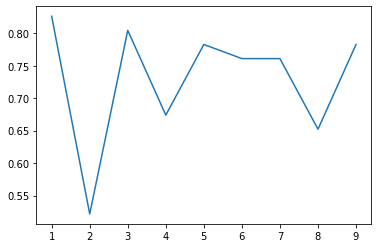

In [32]:
sns.lineplot(k,accuracy)

In [34]:
model=KNeighborsClassifier(n_neighbors=6)
scores=cross_val_score(model, X, Y, cv=10)

In [35]:
scores

array([0.84210526, 0.63157895, 0.63157895, 0.72222222, 0.66666667,
       0.61111111, 0.61111111, 0.66666667, 0.61111111, 0.44444444])

In [36]:
scores.mean()*100

64.3859649122807

In [37]:
for i in range(1,10):
  model=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(model, X, Y, cv=10)
  print(scores.mean()*100)

72.60233918128655
61.19883040935672
74.82456140350877
63.859649122807014
67.69005847953217
64.3859649122807
68.27485380116958
65.99415204678361
72.63157894736842


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


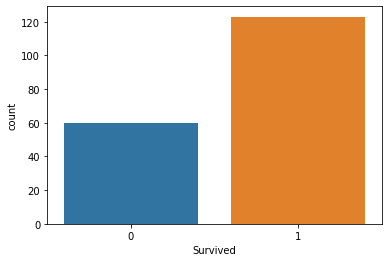

In [38]:
sns.countplot(df["Survived"])

In [39]:
telecom=pd.read_csv("telecom_churn.csv")

In [40]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
telecom["Churn"]=le.fit_transform(telecom["Churn"])

In [42]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [44]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [46]:
telecom=telecom[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn']]

In [47]:
telecom.head()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [48]:
X=telecom[['Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',]]
Y=telecom[["Churn"]]

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)

In [51]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
print(accuracy_score(y_predict, y_test)*100)

88.75562218890555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


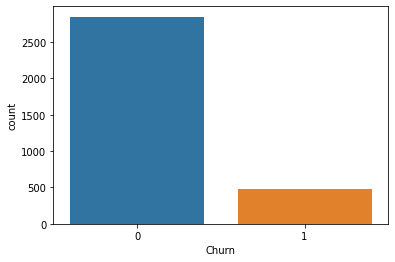

In [52]:
sns.countplot(telecom["Churn"])

In [53]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,